# Part A of Next Gate Tech | Quant Developper Test

## Load Data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_data(path):
    """
    Read CSV exemple file
    :param path: str to CSV training file
    :return: DataFrame
    """
    try:
        d = pd.read_csv(path, index_col=["Subfund_Code","Share_Class_Code"])
    except FileNotFoundError:
        raise FileNotFoundError("Data should are not here : {} !".format(path))
    return d

data = create_data("Data/example.csv")

In [49]:
data.head()

Valuation_Date Subfund_CCY  Net_Asset_Value  \
Subfund_Code Share_Class_Code                                               
1            A                    02/01/2018         EUR      53472989.09   
             A                    03/01/2018         EUR      53615728.16   
             A                    04/01/2018         EUR      53706892.15   
             A                    05/01/2018         EUR      53946703.05   
             A                    08/01/2018         EUR      54051911.14   

                               Nb_Shares_Outstanding  NAV_Per_Share  \
Subfund_Code Share_Class_Code                                         
1            A                           564961.4266       111.6870   
             A                           564974.2414       111.9820   
             A                           565337.9646       112.1000   
             A                           566130.6532       112.4422   
             A                           566282.0000       112.6310   

                              CCY_NAV_share     ISIN_Code  \
Subfund_Code Share_Class_Code                               
1            A                          EUR  LU1234DEMO1A   
             A                          EUR  LU1234DEMO1A   
             A                          EUR  LU1234DEMO1A   
             A                          EUR  LU1234DEMO1A   
             A                          EUR  LU1234DEMO1A   

                               Nb_Shares_Subscribed  Amount_Subscribed  \
Subfund_Code Share_Class_Code                                            
1            A                               0.0000             0.0000   
             A                               0.0000             0.0000   
             A                               0.0000             0.0000   
             A                              25.7948          2441.5616   
             A                             549.7030         52166.4902   

                               Nb_Shares_Redeemed  Amount_Redeemed  \
Subfund_Code Share_Class_Code                                        
1            A                             0.0000           0.0000   
             A                             0.0000           0.0000   
             A                             0.0000           0.0000   
             A                            12.9800        1228.5452   
             A                           185.9798       17649.3662   

                               Subfund_Long_Name  Dividend_Per_Share  \
Subfund_Code Share_Class_Code                                          
1            A                               NaN                 0.0   
             A                               NaN                 0.0   
             A                               NaN                 0.0   
             A                               NaN                 0.0   
             A                               NaN                 0.0   

                               Dividend_Payment_Date  Dividend_PCCY  \
Subfund_Code Share_Class_Code                                         
1            A                                   0.0              0   
             A                                   0.0              0   
             A                                   0.0              0   
             A                                   0.0              0   
             A                                   0.0              0   

                              Dividend_Payment_CCY Dividend_Subfund_CCY  \
Subfund_Code Share_Class_Code                                             
1            A                                   0                  EUR   
             A                                   0                  EUR   
             A                                   0                  EUR   
             A                                   0                  EUR   
             A                                   0                  EUR   

                         

In [50]:
# Check levels
data.index.levels

FrozenList([[1, 2, 3], ['A', 'B', 'C', 'D', 'E']])

In [51]:
# Describe
print("Data length : {}".format(len(data)))
print("Data length per asset : \n")
data.groupby(["Subfund_Code","Share_Class_Code"]).count()

Data length : 2542
Data length per asset : 



Valuation_Date  Subfund_CCY  Net_Asset_Value  \
Subfund_Code Share_Class_Code                                                 
1            A                            251          251              251   
             B                            251          251              251   
             C                            251          251              251   
             D                            251          251              251   
2            A                             34           34               34   
             B                            251          251              251   
             C                            251          251              251   
             D                            251          251              251   
             E                            251          251              251   
3            A                            250          250              250   
             B                            250          250              250   

                               Nb_Shares_Outstanding  NAV_Per_Share  \
Subfund_Code Share_Class_Code                                         
1            A                                   251            251   
             B                                   251            251   
             C                                   251            251   
             D                                   251            251   
2            A                                    34             34   
             B                                   251            251   
             C                                   251            251   
             D                                   251            251   
             E                                   251            251   
3            A                                   250            250   
             B                                   250            250   

                               CCY_NAV_share  ISIN_Code  Nb_Shares_Subscribed  \
Subfund_Code Share_Class_Code                                                   
1            A                           251        251                   251   
             B                           251        251                   251   
             C                           251        251                   251   
             D                           251        251                   251   
2            A                            34         34                    34   
             B                           251        251                   251   
             C                           251        251                   251   
             D                           251        251                   251   
             E                           251        251                   251   
3            A                           250        250                   250   
             B                           250        250                   250   

                               Amount_Subscribed  Nb_Shares_Redeemed  \
Subfund_Code Share_Class_Code                                          
1            A                               251                 251   
             B                               251                 251   
             C                               251                 251   
             D                               251                 251   
2            A                                34                  34   
             B                               251                 251   
             C                               251                 251   
             D                               251                 251   
             E                               251                 251   
3            A                               250                 250   
             B                               250                 250   

                               Amount_Redeemed  Subfund_Long_Name  \
Subfund_Code Share_

- Seems to have less data for asset 2A.
- "Subfund_Long_Name" useless. We will drop it.

In [52]:
# Drop useless columns
data = data.drop(["Subfund_Long_Name"],axis=1)

## 1st Quality check : Nan values in the original DataFrame

In [53]:
# Check for missing data
data.isnull().any()

Valuation_Date           False
Subfund_CCY              False
Net_Asset_Value          False
Nb_Shares_Outstanding    False
NAV_Per_Share            False
CCY_NAV_share            False
ISIN_Code                False
Nb_Shares_Subscribed     False
Amount_Subscribed        False
Nb_Shares_Redeemed       False
Amount_Redeemed          False
Dividend_Per_Share       False
Dividend_Payment_Date    False
Dividend_PCCY            False
Dividend_Payment_CCY     False
Dividend_Subfund_CCY     False
Total_Net_Assets         False
dtype: bool

Ok no nan here.

## 2nd Quality check : data type and extreme values

In [6]:
# Check first and last date
print(data.groupby(["Subfund_Code","Share_Class_Code"])["Valuation_Date"].min())
print(data.groupby(["Subfund_Code","Share_Class_Code"])["Valuation_Date"].max())

Subfund_Code  Share_Class_Code
1             A                   01/02/2018
              B                   01/02/2018
              C                   01/02/2018
              D                   01/02/2018
2             A                   01/02/2018
              B                   01/02/2018
              C                   01/02/2018
              D                   01/02/2018
              E                   01/02/2018
3             A                   01/02/2018
              B                   01/02/2018
Name: Valuation_Date, dtype: object
Subfund_Code  Share_Class_Code
1             A                   31/12/2018
              B                   31/12/2018
              C                   31/12/2018
              D                   31/12/2018
2             A                   31/01/2018
              B                   31/12/2018
              C                   31/12/2018
              D                   31/12/2018
              E                   31/12/2018
3 

Generally data start on february and end on december. However 2A ends up eraly, explaining the 34 observations.

In [7]:
# Check Values for categorical features
categorical_features = ["Subfund_CCY","CCY_NAV_share","ISIN_Code","Dividend_Payment_CCY","Dividend_Subfund_CCY"]

for col in categorical_features:
    print("Values for : ",col," : \n", data[col].unique())

Values for :  Subfund_CCY  : 
 ['EUR' 'USD' 'NOK']
Values for :  CCY_NAV_share  : 
 ['EUR' 'SGD' 'CZK' 'USD' 'NOK']
Values for :  ISIN_Code  : 
 ['LU1234DEMO1A' 'LU1234DEMO1B' 'LU1234DEMO1C' 'LU1234DEMO1D'
 'LU1234DEMO2A' 'LU1234DEMO2B' 'LU1234DEMO2C' 'LU1234DEMO2D'
 'LU1234DEMO2E' 'LU1234DEMO3A' 'LU1234DEMO3B']
Values for :  Dividend_Payment_CCY  : 
 ['0' 'EUR' 'SGD' 'USD']
Values for :  Dividend_Subfund_CCY  : 
 ['EUR' 'USD' 'NOK']


Ok we have 11 ISIN code so 11 assets.
- Strange values for Dividend_Payment_CCY : mix of int and str

In [8]:
# Check values for numerical data
numerical_features = ["Net_Asset_Value","Nb_Shares_Outstanding","NAV_Per_Share","Nb_Shares_Subscribed","Amount_Subscribed","Nb_Shares_Redeemed","Amount_Redeemed","Dividend_Per_Share","Dividend_Payment_Date","Dividend_PCCY","Total_Net_Assets"]
for col in numerical_features:
    print("Describe ",col," : \n", data[col].describe(),"\n")

Describe  Net_Asset_Value  : 
 count    2.542000e+03
mean     3.394277e+08
std      3.985079e+08
min      1.174690e+02
25%      1.599386e+07
50%      2.602002e+08
75%      5.203370e+08
max      1.439665e+09
Name: Net_Asset_Value, dtype: float64 

Describe  Nb_Shares_Outstanding  : 
 count    2.542000e+03
mean     3.232240e+06
std      3.966065e+06
min      1.180000e+00
25%      1.209026e+05
50%      5.679709e+05
75%      5.816585e+06
max      1.146561e+07
Name: Nb_Shares_Outstanding, dtype: float64 

Describe  NAV_Per_Share  : 
 count    2542.000000
mean      379.033129
std       755.335554
min        33.370400
25%       105.565750
50%       120.348200
75%       195.378500
max      2870.822000
Name: NAV_Per_Share, dtype: float64 

Describe  Nb_Shares_Subscribed  : 
 count      2542.000000
mean       2145.204749
std       12710.538732
min           0.000000
25%           0.000000
50%           0.000000
75%         644.253450
max      377702.624600
Name: Nb_Shares_Subscribed, dtype: floa

- Dividen_PCCY always equals 0. We will drop it.
- Other series seem ok, minimum and maximum are not too extremes

In [47]:
# Drop useless column
data = data.drop("Dividend_PCCY",axis=1)

# Compute correlations

First I start by reshaping the DataFrame :

In [56]:
sub_data = data[["Valuation_Date","NAV_Per_Share"]].set_index(["Valuation_Date"],append=True)
sub_data = sub_data.reset_index()
sub_data.head()

,Subfund_Code,Share_Class_Code,Valuation_Date,NAV_Per_Share
0,1,A,02/01/2018,111.6870
1,1,A,03/01/2018,111.9820
2,1,A,04/01/2018,112.1000
3,1,A,05/01/2018,112.4422
4,1,A,08/01/2018,112.6310


In [45]:
# Create new columns names
name = []
for i in range(len(sub_data[["Subfund_Code","Share_Class_Code"]])):
    name.append(str(sub_data.iloc[i]["Subfund_Code"])+str(sub_data.iloc[i]["Share_Class_Code"]))
new_names = pd.Series(name,index=sub_data.index,name="Asset")
sub_data = pd.concat((sub_data,new_names),axis=1)
sub_data = sub_data.drop(["Subfund_Code","Share_Class_Code"],axis=1)
sub_data

,Valuation_Date,NAV_Per_Share,Asset
0,02/01/2018,111.6870,1A
1,03/01/2018,111.9820,1A
2,04/01/2018,112.1000,1A
3,05/01/2018,112.4422,1A
4,08/01/2018,112.6310,1A
...,...,...,...
2537,21/12/2018,274.8456,3B
2538,22/12/2018,275.1642,3B
2539,27/12/2018,277.4298,3B
2540,28/12/2018,278.4210,3B


In [46]:
res = pd.DataFrame()
for asset in sub_data["Asset"].unique():
    serie = sub_data.loc[sub_data["Asset"]== asset][["NAV_Per_Share","Valuation_Date"]]
    pd_serie = pd.DataFrame(serie,columns=["NAV_Per_Share","Valuation_Date"])
    pd_serie = pd_serie.set_index(["Valuation_Date"])
    pd_serie = pd_serie.rename(columns={"NAV_Per_Share" : "NAV_Per_Share_"+asset})
    res = pd.concat((res,pd_serie),axis=1)
res

,NAV_Per_Share_1A,NAV_Per_Share_1B,NAV_Per_Share_1C,NAV_Per_Share_1D,NAV_Per_Share_2A,NAV_Per_Share_2B,NAV_Per_Share_2C,NAV_Per_Share_2D,NAV_Per_Share_2E,NAV_Per_Share_3A,NAV_Per_Share_3B
02/01/2018,111.6870,118.1770,126.3544,112.1118,121.8232,37.1110,196.0334,132.4432,121.4220,2508.1490,244.1892
03/01/2018,111.9820,118.4956,126.6848,112.4068,122.2126,37.1818,196.6824,132.8680,121.8232,2517.0226,245.0270
04/01/2018,112.1000,118.6254,126.8146,112.5248,122.8616,37.2526,197.7208,133.5642,122.4604,2512.3262,244.5904
05/01/2018,112.4422,118.9794,127.2158,112.8670,123.2982,37.4296,198.4524,134.0480,122.9206,2513.3174,244.6848
08/01/2018,112.6310,119.1800,127.4282,113.0558,123.4280,37.6302,198.6884,134.1896,123.0504,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
01/12/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2793.4730,271.1050
08/12/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2786.1098,270.3852
15/12/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2803.9396,272.1080
22/12/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2835.5990,275.1642


This new shape clearly shows missing data. Let's plot the series :

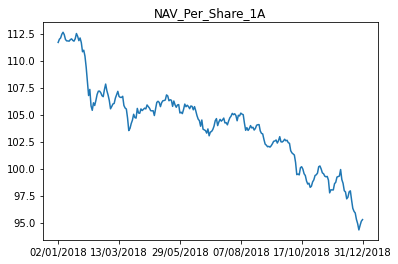

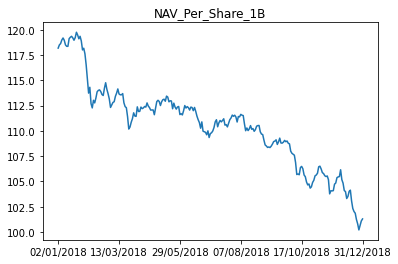

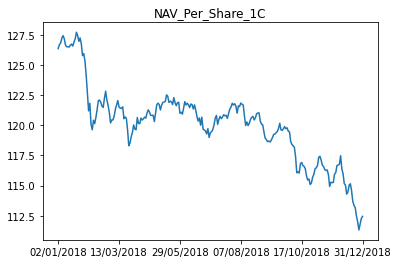

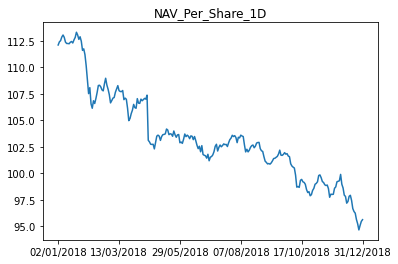

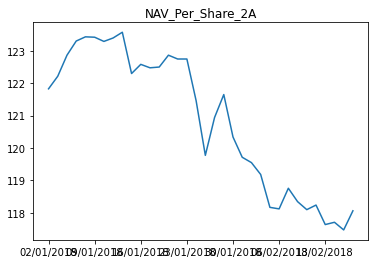

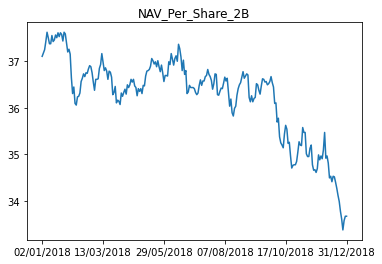

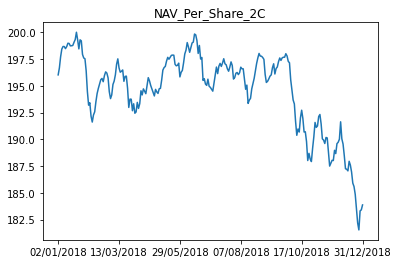

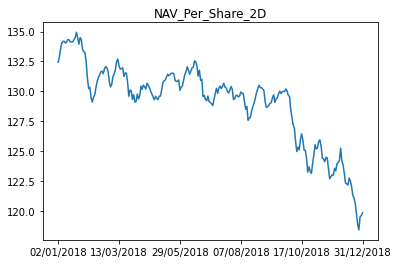

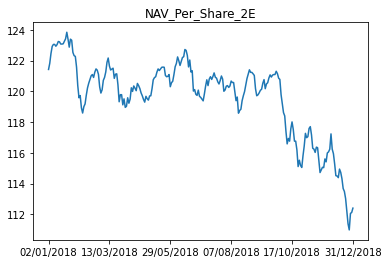

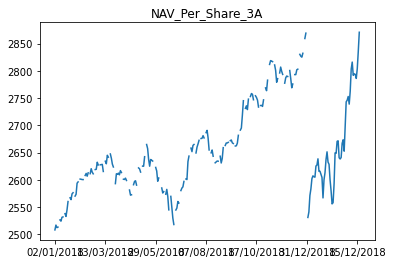

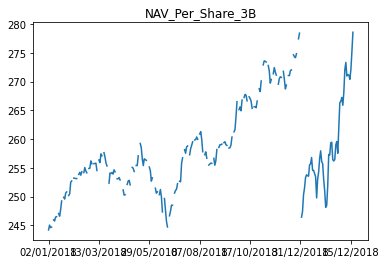

In [62]:
for col in res.columns:
    res[col].plot()
    plt.title(col)
    plt.show()

3A and 3B are strange.

We will now compute returns and then correlations. Correlations can be visualized in three ways :
- matrix
- heatmap plot
- pairplot
### Matrix

In [57]:
res.pct_change().corr()

,NAV_Per_Share_1A,NAV_Per_Share_1B,NAV_Per_Share_1C,NAV_Per_Share_1D,NAV_Per_Share_2A,NAV_Per_Share_2B,NAV_Per_Share_2C,NAV_Per_Share_2D,NAV_Per_Share_2E,NAV_Per_Share_3A,NAV_Per_Share_3B
NAV_Per_Share_1A,1.000000,0.990436,0.979871,0.834005,0.219853,0.642765,0.753396,0.755397,0.757173,0.028346,0.030253
NAV_Per_Share_1B,0.990436,1.000000,0.956096,0.826217,0.166898,0.623846,0.734782,0.737983,0.740267,0.031022,0.032893
NAV_Per_Share_1C,0.979871,0.956096,1.000000,0.817508,0.239134,0.653055,0.763211,0.760605,0.762146,0.023273,0.025171
NAV_Per_Share_1D,0.834005,0.826217,0.817508,1.000000,0.199994,0.561047,0.604058,0.651618,0.652808,0.048272,0.050817
NAV_Per_Share_2A,0.219853,0.166898,0.239134,0.199994,1.000000,0.202707,0.229506,0.222243,0.229740,0.004184,0.004414
NAV_Per_Share_2B,0.642765,0.623846,0.653055,0.561047,0.202707,1.000000,0.816301,0.818253,0.819797,0.005583,0.007070
NAV_Per_Share_2C,0.753396,0.734782,0.763211,0.604058,0.229506,0.816301,1.000000,0.995392,0.996099,0.017108,0.017243
NAV_Per_Share_2D,0.755397,0.737983,0.760605,0.651618,0.222243,0.818253,0.995392,1.000000,0.999164,0.022123,0.022464
NAV_Per_Share_2E,0.757173,0.740267,0.762146,0.652808,0.229740,0.819797,0.996099,0.999164,1.000000,0.021405,0.021696
NAV_Per_Share_3A,0.028346,0.031022,0.023273,0.048272,0.004184,0.005583,0.017108,0.022123,0.021405,1.000000,0.999504


### Heatmap

<AxesSubplot:>

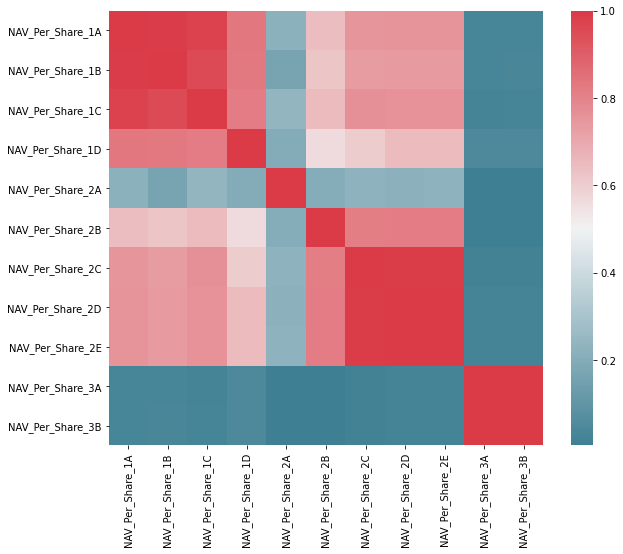

In [37]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(res.pct_change().corr(), mask=np.zeros_like(res.pct_change().corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

### Pairplot

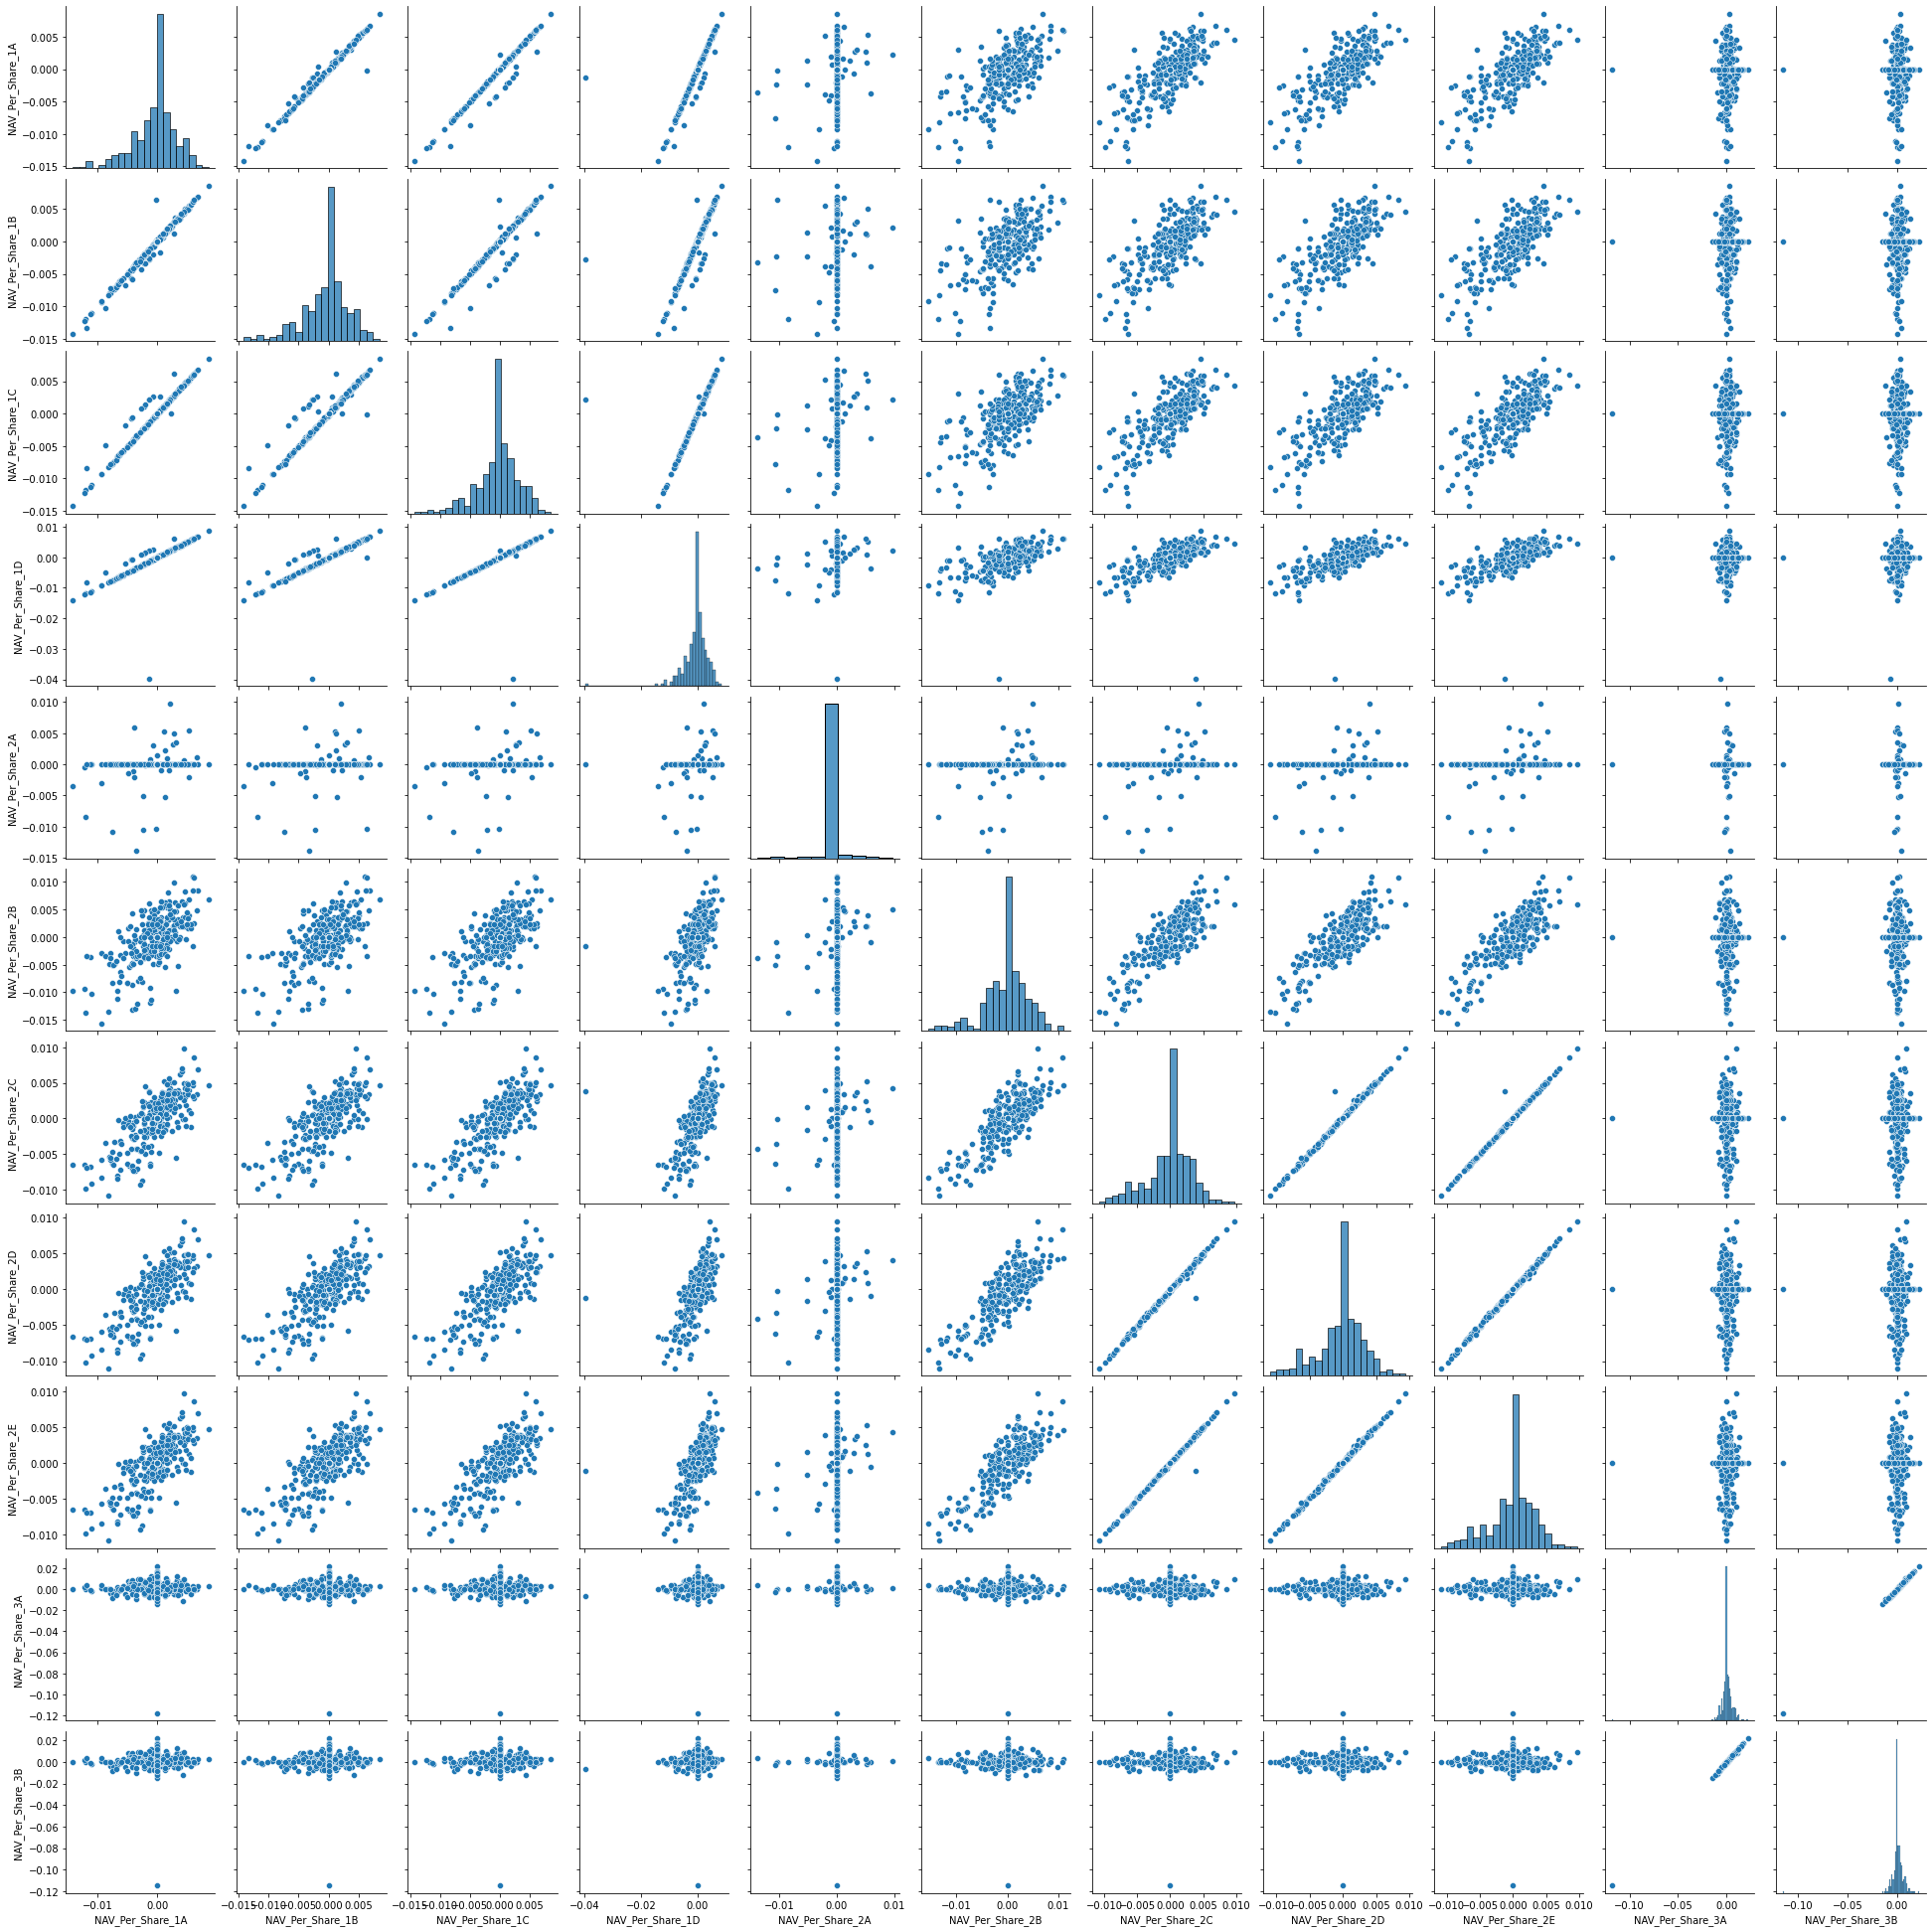

In [38]:
sns.pairplot(res.pct_change())